# ECE 311 Lab Final:

## Due Date: Sunday, 12/13 @ 11:59PM
### Note: a 10% penalty will be applied for each hour your submission is late!

This lab final will review the import concepts from the course. Much of this lab should be familiar from previous labs. We encourage you to look back on your previous labs or look at the posted lab solutions on the course website to remind you how to produce your results and evaluate their correctness. Enough talking, let's get started!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from scipy import signal
from pz_plot import pz_plot
from scipy.io import wavfile
from numpy.random import randn
from IPython.display import Audio

#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

%matplotlib inline

## Exercise 1: Building an Edge Detector 2.0

In Lab 2 Exercise 4, we built a simple edge detector by applying a high-pass filter along the rows and columns of an image, then combined the two results to create an image of detected edges. In this exercise, we will build a more sophisticated edge detector by adding onto our original design. This improved detector is known as the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

The Sobel operator uses the same intuition of finding horizontal and vertical edges separately, then combining these results to form the image. Let $G_x$ be our resulting image from detecting vertical edges (through the x-axis) and $G_y$ be our resulting image from detecting horizontal edges (through the y-axis, then our final result will be given by

$$
G[i,j] = \sqrt{G^2_x[i,j]+G^2_y[i,j]},
$$

where $G[i,j]$ is the pixel value at row $i$, column $j$. We compute $G_x$ and $G_y$ via convolution as follows:

$$
G_x = I * \begin{bmatrix}
1 & 0 & -1\\
\end{bmatrix} * \begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$
G_y = I * \begin{bmatrix}
1\\
0\\
-1\\
\end{bmatrix} * \begin{bmatrix}
1 & 2 & 1\\
\end{bmatrix},
$$

where $I$ is our original image and $*$ denotes the convolution operator. Note that in the computation of $G_x$ we convolve along the rows with a high-pass filter and convolve along the columns with a low-pass filter, while the computation of $G_y$ reverses this relationship with the same filters.

a. Compute the image $G_x$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **row** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **column**. Also, be sure to use the "same" mode when using $\textrm{signal.convolve()}$.

b. Compute the image $G_y$ by performing the two convolutions along the rows and columns, respectively, using $\textrm{signal.convolve()}$. Plot your resulting image in grayscale. Remember that you should apply the high-pass filter $\begin{bmatrix}1 & 0 & -1\end{bmatrix}$ to each **column** and the low-pass filter $\begin{bmatrix}1 & 2 & 1\end{bmatrix}$ to each **row**.

c. Create final result image $G$ according to the above formulation. Plot your resulting image in grayscale.

Text(0.5, 1.0, 'Image G (Part C)')

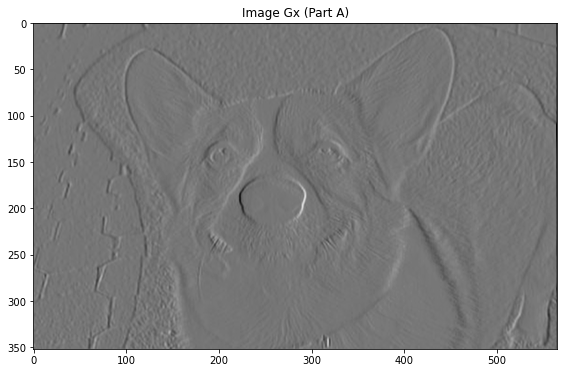

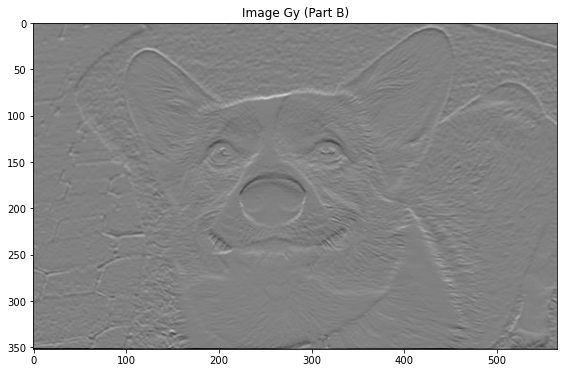

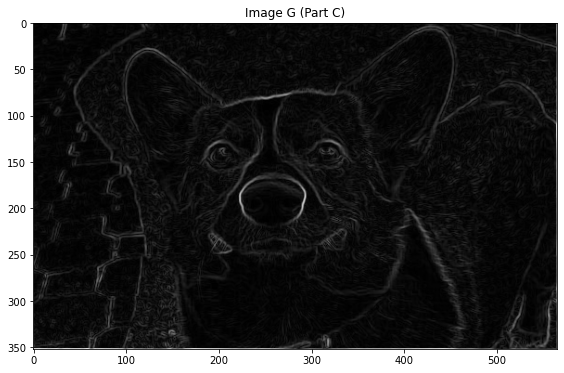

In [2]:
#load test-image.jpg
image = imread('test-image.jpg')
n_rows,n_cols = image.shape
#Code for part a.
a = np.zeros(image.shape)
h_row = [1, 0, -1]
h_col = [1, 2, 1]

for i in range(0,n_rows):
    a[i,:] = signal.convolve(image[i,:],h_row, 'same')
    
for i in range(0,n_cols):
    a[:,i] = signal.convolve(a[:,i], h_col, 'same')

plt.figure(figsize=(10,6))
plt.imshow(a,'gray')
plt.title('Image Gx (Part A)')

#Code for part b:
b = np.zeros(image.shape)
h_col = [1, 0, -1]
h_row = [1, 2, 1]

for i in range(0,n_rows):
    b[i,:] = signal.convolve(image[i,:],h_row, 'same')
    
for i in range(0,n_cols):
    b[:,i] = signal.convolve(b[:,i], h_col, 'same')

plt.figure(figsize=(10,6))
plt.imshow(b,'gray')
plt.title('Image Gy (Part B)')

#Code for part c:
c = np.zeros(image.shape)

c = np.sqrt(np.power(a,2) + np.power(b,2)) 

plt.figure(figsize=(10,6))
plt.imshow(c,'gray')
plt.title('Image G (Part C)')



## Exercise 2: LCCDE, Transfer Function, and Impulse Response

For each of the following Linear Constant Coefficient Difference Equations (LCCDE), determine the transfer function (numerator and denominator coefficients) in order to plot both the pole-zero plot and impulse response of the system for the requested number of points. **Please plot your impulse responses as a stem plot!** For each system, indicate whether it is BIBO stable, marginally stable, or not BIBO stable and briefly explain your choice.

Note: We have provided the $\textrm{pz_plot}()$ function from Lab 3 to create your pole-zero plots. Refer to Lab 3 for usage of this function. Some other functions of interest you may want to use from Lab 3 will be $\textrm{signal.dimpulse()}$ and $\textrm{signal.tf2zpk()}$.

a. $y_1[n] = \frac{1}{3}x[n]-\frac{1}{9}x[n-1]+x[n-2]-
\frac{1}{9}x[n-3]+\frac{1}{3}x[n-4],\quad 0\leq n < 8$

b. $y_2[n] = x[n] + \frac{1}{4}x[n-2] - y_2[n-1] + 6y_2[n-2],\quad 0\leq n < 20$

c. $y_3[n] = x[n] - \frac{1}{2}x[n-2] - y_3[n-2], \quad 0\leq n < 20$

Part 2a
Poles: [0. 0. 0. 0.]
Zeros: [0.12026537+1.60542522j 0.12026537-1.60542522j 0.04640129+0.61941193j
 0.04640129-0.61941193j]
Part 2b
Poles: [-3.  2.]
Zeros: [-0.+0.5j  0.-0.5j]
Part 2c
Poles: [-0.+1.j  0.-1.j]
Zeros: [ 0.70710678 -0.70710678]


<ipython-input-3-3c2e2cf4f670>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n,h_n)
<ipython-input-3-3c2e2cf4f670>:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n,h_n)
<ipython-input-3-3c2e2cf4f670>:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_col

Text(0.5, 1.0, 'Impulse Response (Part C)')

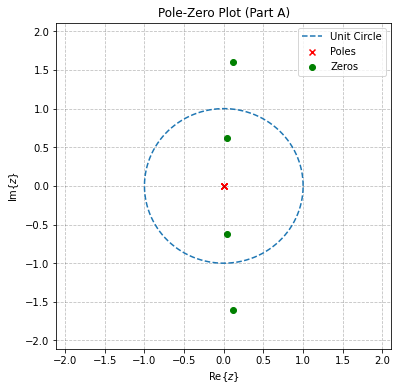

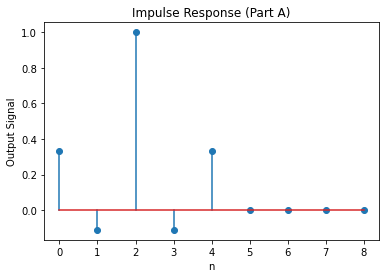

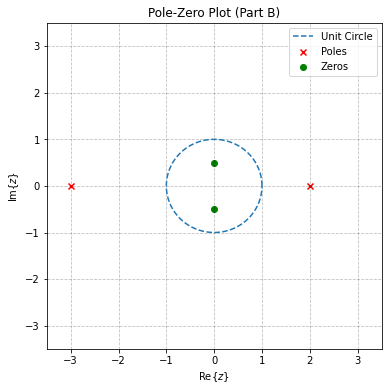

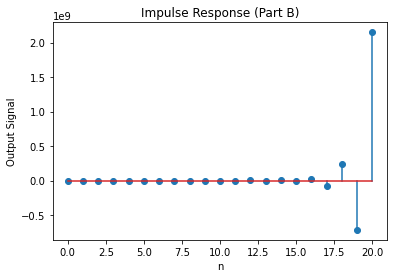

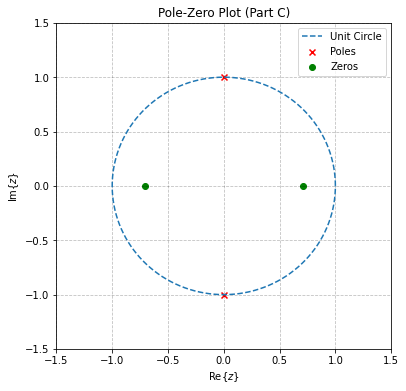

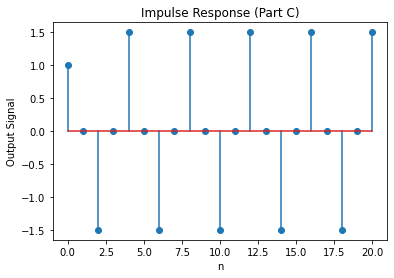

In [3]:
#Code for exercise 2:
print('Part 2a')
b = [1/3, -1/9, 1, -1/9, 1/3]
a = [1, 0, 0, 0, 0]

z, p, _ = signal.tf2zpk(b,a)
print('Poles:',p)
print('Zeros:',z)
pz_plot(z,p,'Pole-Zero Plot (Part A)')

n,y = signal.dimpulse((b,a,1),n=9)
h_n = y[0]

plt.figure()
plt.stem(n,h_n)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response (Part A)')


print('Part 2b')
b = [1, 0, 1/4]
a = [1, 1, -6]

z, p, _ = signal.tf2zpk(b,a)
print('Poles:',p)
print('Zeros:',z)
pz_plot(z,p,'Pole-Zero Plot (Part B)')

n,y = signal.dimpulse((b,a,1),n=21)
h_n = y[0]

plt.figure()
plt.stem(n,h_n)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response (Part B)')


print('Part 2c')
b = [1, 0, -1/2]
a = [1, 0, 1]

z, p, _ = signal.tf2zpk(b,a)
print('Poles:',p)
print('Zeros:',z)
pz_plot(z,p,'Pole-Zero Plot (Part C)')

n,y = signal.dimpulse((b,a,1),n=21)
h_n = y[0]

plt.figure()
plt.stem(n,h_n)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response (Part C)')

Comments for 2.a:
I believe it is BIBO stable since ROC |z| > 0

Comments for 2.b:
I believe it is BIBO stable. We can see the poles are between 0 & 1. Thus, ROC is within unit circle. 

Comments for 2.c:
I believe it is BIBO stable. We can see the poles are between 0 & 1. Thus, ROC is within unit circle. 

## Exercise 3: Windows and Spectral Resolution

**Note: please specify 512 points for each FFT you take in this problem!**

a. Plot the magnitude spectrum (not dB scale) of the following signal using $\textrm{np.fft.rfft()}$.

$$
x_1[n] = 0.5\sin\left(0.5\pi n\right) + 0.05\sin\left(0.57\pi n\right), \quad 0\leq n < 80
$$

What is happening to the second sinusoid with the smaller magnitude in the frequency domain? Is it easy to locate this frequency peak?

b. Fill in the function $\textrm{modify()}$ below which applies a Hamming window to an input signal. Apply this function to $x_1[n]$ and plot the resulting magnitude spectrum. Is it easier to locate the smaller frequency now?

c. Now let's try resolving two close, but equally large frequency peaks in the below signal $x_2[n]$.

$$
x_2[n] = 0.5\sin\left(0.5\pi n\right) + 0.5\sin\left(0.518\pi n\right), \quad 0\leq n < 80
$$

Plot the magnitude spectrum of $x_2[n]$ (not dB scale) before and after applying the $\textrm{modify()}$ function. Is it easier to differentiate between the two peaks after applying the Hamming window? Why or why not? **Hint: think about the tradeoff between rectangular and Hamming windows!**


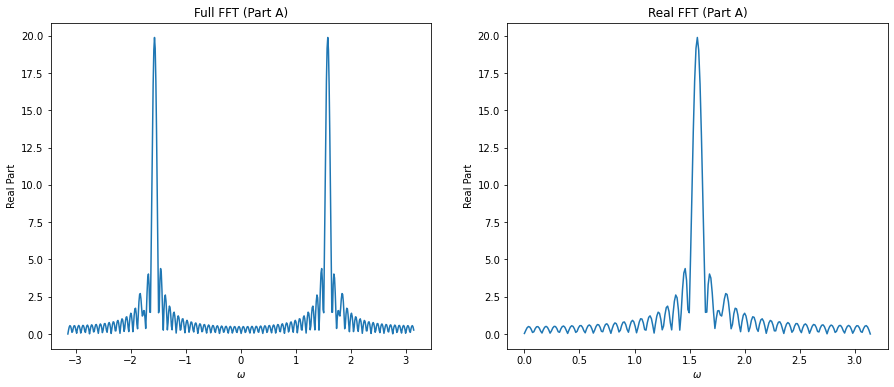

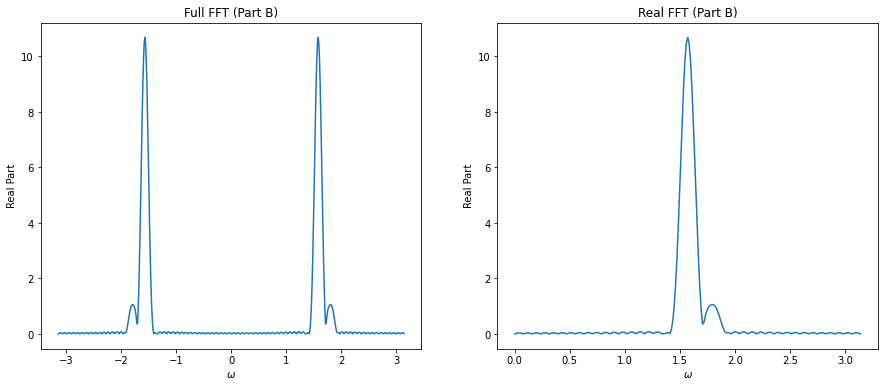

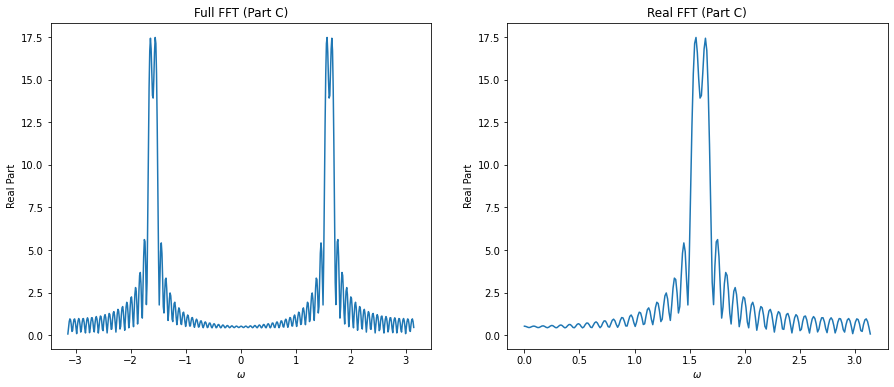

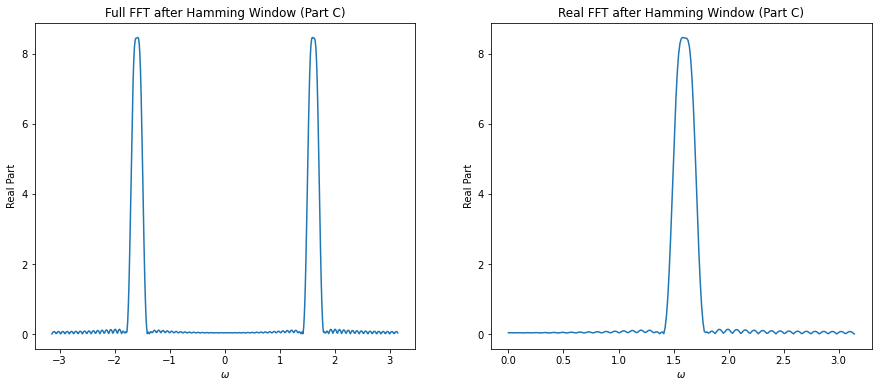

In [4]:
#Code for part 3.a:
x1 = np.zeros(80)

for i in range (len(x1)) :
    x1[i] = 0.5 * np.sin(0.5 * np.pi * i) + 0.05 * np.sin(0.57 * np.pi * i)

full_fft = np.fft.fft(x1,512)
centered_fft = np.fft.fftshift(full_fft)
real_fft = np.fft.rfft(x1,512)

omega_full = np.linspace(-np.pi,np.pi,len(centered_fft))
omega_real = np.linspace(0,np.pi,len(real_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Full FFT (Part A)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centered_fft))

plt.subplot(122)
plt.title('Real FFT (Part A)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_real,np.absolute(real_fft))


#Code for part 3.b:
def modify(x):
    #apply a hamming window to the signal
    window = signal.hamming(len(x))
    modified = x * window
    
    return modified

x1_modified = modify(x1)

full_fft = np.fft.fft(x1_modified,512)
centered_fft = np.fft.fftshift(full_fft)
real_fft = np.fft.rfft(x1_modified,512)

omega_full = np.linspace(-np.pi,np.pi,len(centered_fft))
omega_real = np.linspace(0,np.pi,len(real_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Full FFT (Part B)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centered_fft))

plt.subplot(122)
plt.title('Real FFT (Part B)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_real,np.absolute(real_fft))


#Code for part 3.c:
x2 = np.zeros(80)

for i in range (len(x1)) :
    x2[i] = 0.5 * np.sin(0.5 * np.pi * i) + 0.5 * np.sin(0.518 * np.pi * i)

full_fft = np.fft.fft(x2,512)
centered_fft = np.fft.fftshift(full_fft)
real_fft = np.fft.rfft(x2,512)

omega_full = np.linspace(-np.pi,np.pi,len(centered_fft))
omega_real = np.linspace(0,np.pi,len(real_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Full FFT (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centered_fft))

plt.subplot(122)
plt.title('Real FFT (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_real,np.absolute(real_fft))


x2_modified = modify(x2)

full_fft = np.fft.fft(x2_modified,512)
centered_fft = np.fft.fftshift(full_fft)
real_fft = np.fft.rfft(x2_modified,512)

omega_full = np.linspace(-np.pi,np.pi,len(centered_fft))
omega_real = np.linspace(0,np.pi,len(real_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Full FFT after Hamming Window (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centered_fft))

plt.subplot(122)
plt.title('Real FFT after Hamming Window (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_real,np.absolute(real_fft))


Comments for part 3.a:
We can see that smaller sinusoid does appear in our FFT of the signal. There are probably ways to find it, however, since it is much smaller and close in the freq of the other sinusoidal component, it will be difficult. 

Comments for part 3.b:
yes, it is easier to see the smaller sinusoids freq in the FFT of the signal. This is because freq content is closer together.

Comments for part 3.c:
I do not think so. The Hamming Window isnt as good as rectrangular window as seen in the spectrum. This is mainly due to the fact that the window can either have narrow main lobe width or lower side lobes, but not both; the rectangular window has a very narrow main lobe, but the side lobes are quite high, while the opposite is true for the hamming window. 


## Exercise 4: Chirp Redux

For this exercise, we will revisit the chirp activity from Lab 4 but this time with the help of spectrograms to visualize our chirps. The below provided code creates a five second long chirp signal with sampling rate $f_s = 44,100~Hz$ and maximum signal frequency $22,050~Hz$. Recall that the $\textrm{signal.chirp}$ function linearly sweeps between the requested frequencies over the set time interval. Hint: referring back to Labs 4 and 5 will help with understanding the chirp function and plotting spectrograms, respectively.

a. Plot the spectrogram of the original chirp signal we have generated for you.

b. Reduce the sampling rate of the original chirp signal by a factor of 5. Plot the resulting spectrogram and explain what you see. If we listened to this audio signal, how many rises and falls would you hear? **Note: you may either create a new chirp signal using the requested lower sampling or perform downsampling without an anti-aliasing filter.**

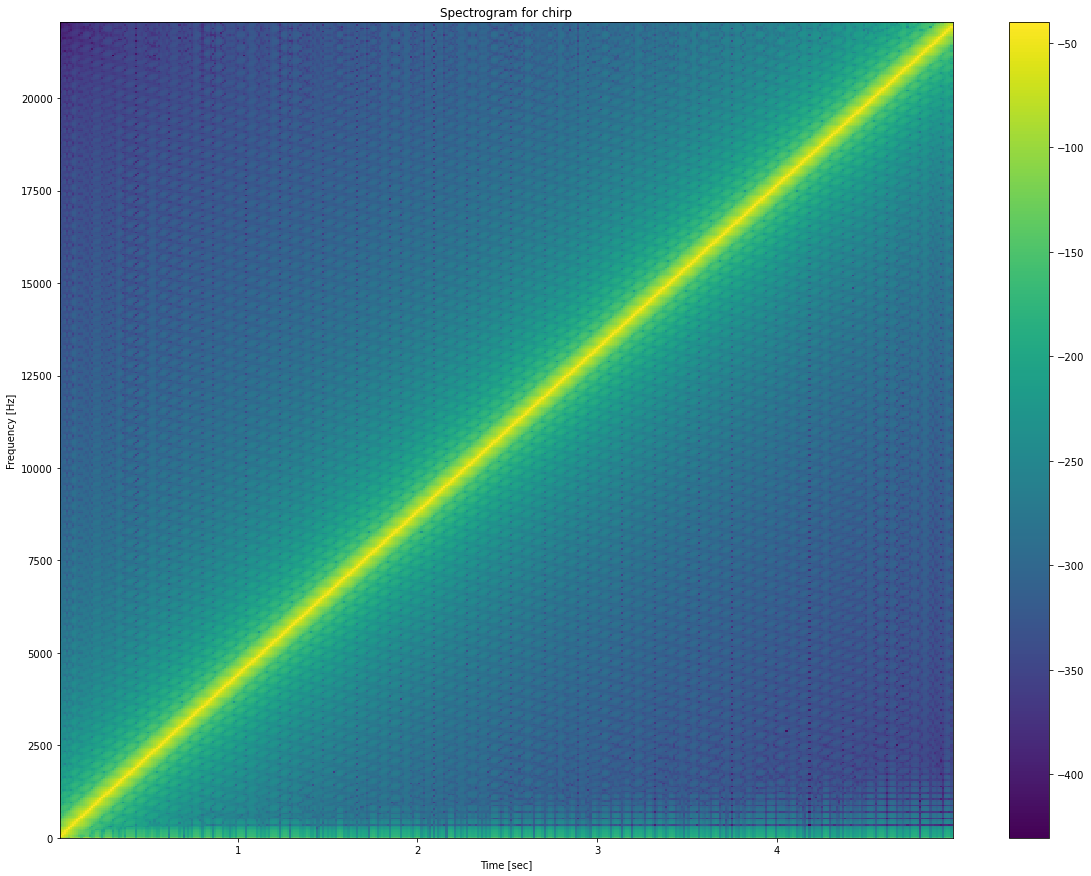

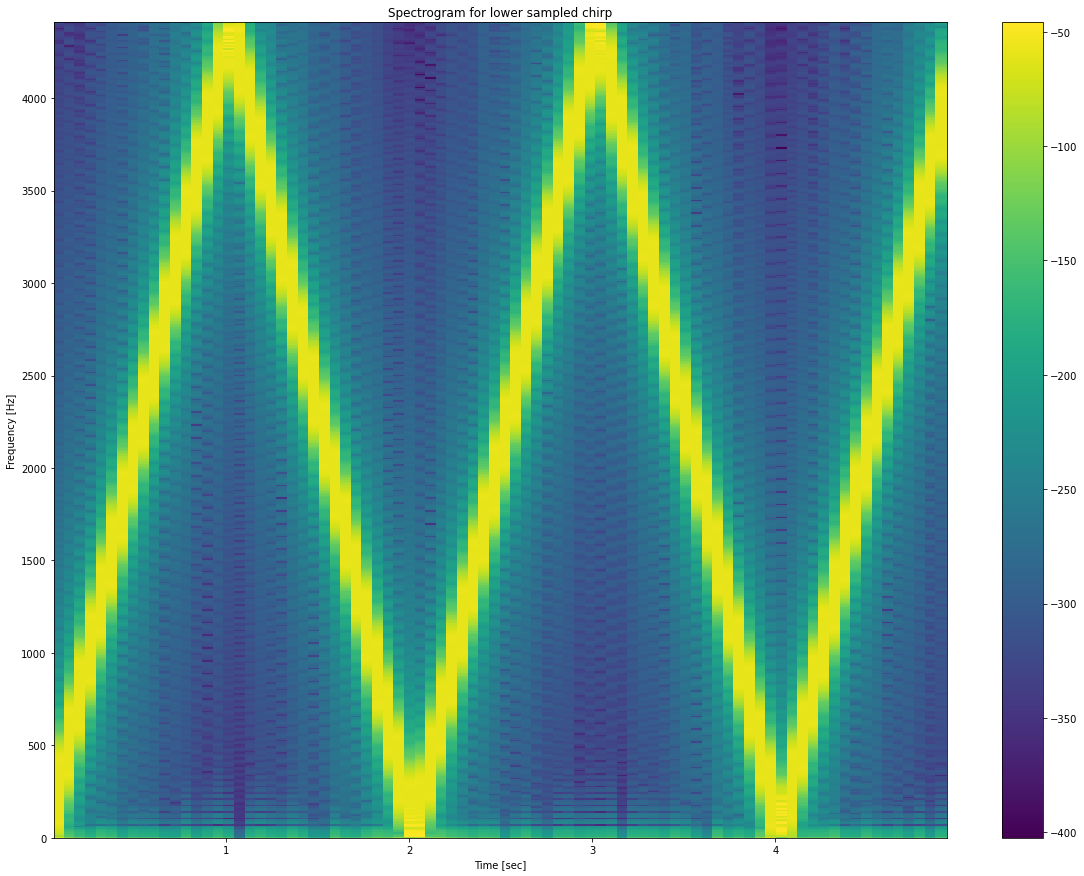

In [5]:
Fs = 44100 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t,f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

#Code for part 4.a:
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)

f_chirp, t_chirp, S_chirp = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

plt.figure(figsize=(20,15))
plt.pcolormesh(t_chirp, f_chirp, sig2db(S_chirp))

plt.title('Spectrogram for chirp')
# plt.ylim([0, 4000])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

#Code for part 4.b:
Fs = 8820 #sampling rate for audio clip in Hz
t1 = 5 #make clips 5 seconds
t = np.linspace(0,t1,t1*Fs)
f0 = 0 #start frequency (Hz)
f1 = 22050 #end frequency (Hz)
chirp_original = signal.chirp(t,f0 = f0, t1 = t1, f1 = f1)
nfft = 1024

f_chirp, t_chirp, S_chirp = signal.spectrogram(chirp_original, Fs, nperseg = nfft, noverlap = int(nfft/2), nfft = nfft)

plt.figure(figsize=(20,15))
plt.pcolormesh(t_chirp, f_chirp, sig2db(S_chirp))

plt.title('Spectrogram for lower sampled chirp')
# plt.ylim([0, 4000])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()



Comments for 4.b:
my guess is that if we listneed to the lower sampled chirp sounds, we would hear the 3 rises and 2 falls. 


## Exercise 5: FIR Filter Design

a. Given the audio signal file ``Sound_original.wav``, compute and display the full FFT magnitude spectrum (no dB scale). Try listening to it!

b. Now let's assume that we pass this audio signal into a system described as followed.

<img src="./sys_illus.png" alt="Drawing" style="width: 600px;"/>

where $x[n]$ is our audio signal, $H(\omega)$ is an LTI system with impulse response $h[n]$, $d[n]$ is some noise, and $y[n]$ is the ouput. 
For this question, we want to simulate the ouput result $y[n]$.

We only know that the LTI system $H(\omega)$ is acting like a low-pass filter with a cutoff frequency of $\frac{\pi}{3}$. Use $\textrm{signal.remez()}$ to obtain the impulse response of this system assuming the filter length is $N = 100$ and the transition bandwidth is $\frac{\pi}{10}$. Plot magnitude response **on a dB scale** using the provided $\textrm{sig2db()}$ function. 

c. Now, we can obtain output $y[n]$ by filtering $x[n]$ with $h[n]$ and adding $d[n]$ after filtering. 

Here, $d[n]$ is assumed to be additive white Gaussian noise (AWGN). We can create our noise $d[n]$ by typing

``d = 1000 * np.random.randn(len(x_filtered))``

Compute $y[n]$ by summing your filtered audio signal $x[n]*h[n]$ and d. Try listening to y! Plot the FFT magnitude spectrum of $d[n]$ and the FFT magnitude spectrum of $y[n]$ on separate figures (no dB scale). Judging from these two graphs, do you think the simple filtering methods we have discussed in class will be able to perfectly separate our noise $d[n]$ from the filtered audio $x[n]*h[n]$?

<ipython-input-6-d5990a0b1fbf>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,original = wavfile.read('Sound_original.wav')


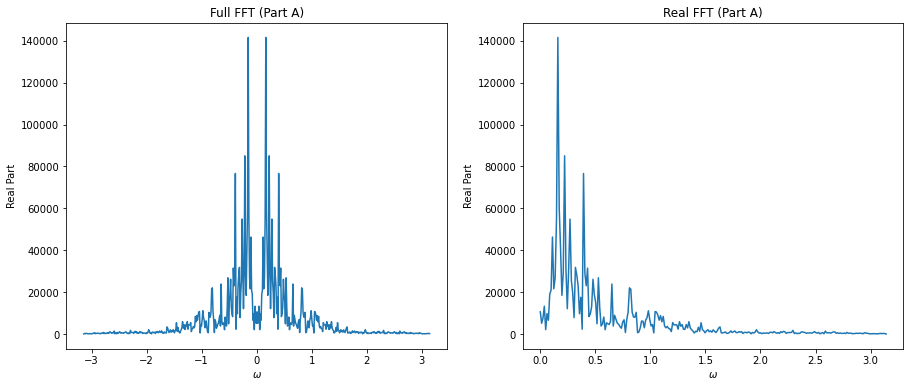

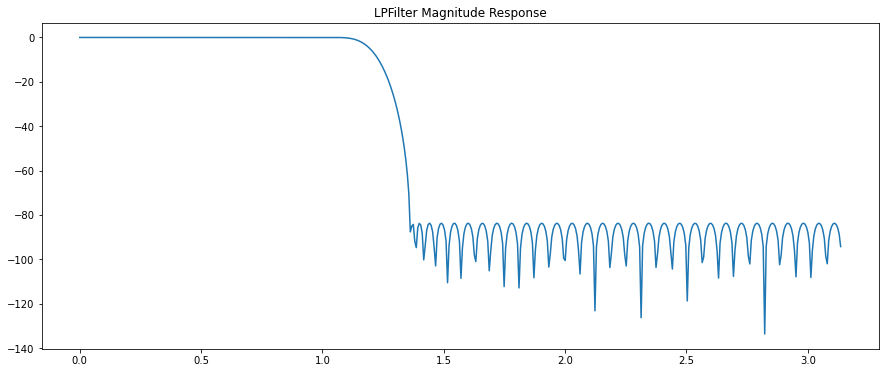

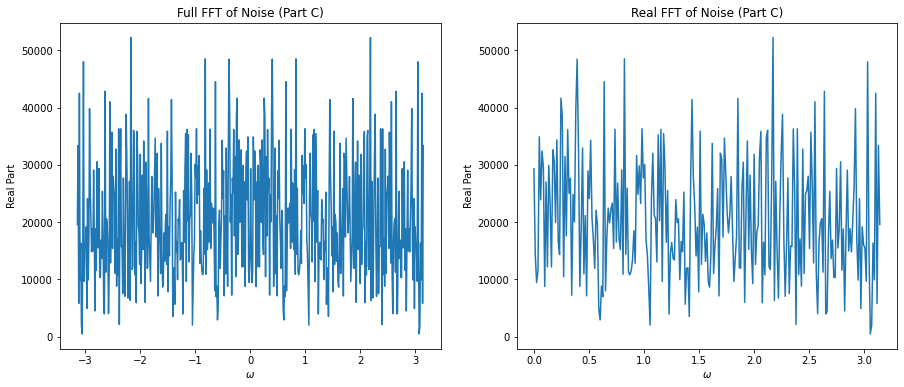

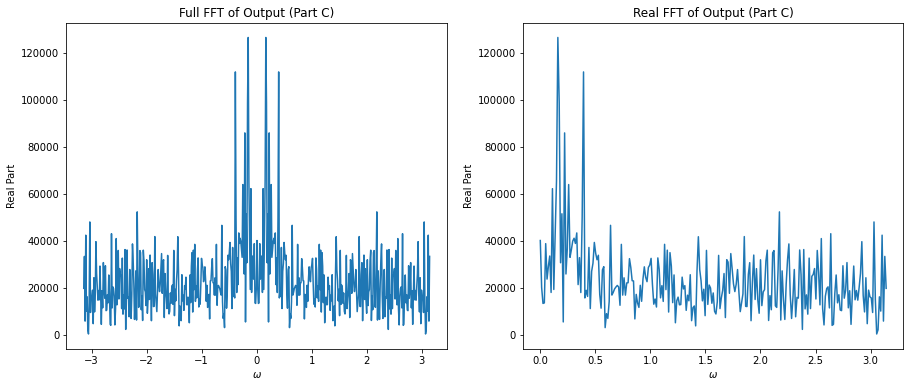

In [6]:
#Utility function for dB scaling of magnitude spectra
def sig2db(mag_spec):
    return 20*np.log10(mag_spec)
fs,original = wavfile.read('Sound_original.wav')

#Code for 5.a:
x = original

full_fft = np.fft.fft(x,512)
centered_fft = np.fft.fftshift(full_fft)
real_fft = np.fft.rfft(x,512)

omega_full = np.linspace(-np.pi,np.pi,len(centered_fft))
omega_real = np.linspace(0,np.pi,len(real_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Full FFT (Part A)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centered_fft))

plt.subplot(122)
plt.title('Real FFT (Part A)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_real,np.absolute(real_fft))


#Code for 5.b:
N = 100
a = [1,0]
#Low-pass Filter
#0-0.5 is passband, 0.7-1 is the stopband, transition band is then 0.5-0.7
lpf_bands = [0,1/3,1/3 + 0.1,1]
lpf_desired = [1,0] #gain of one for passband, gain of zero for stopband
lpf = signal.remez(N,lpf_bands,lpf_desired,fs=2)
w,H_lpf = signal.freqz(lpf,a)

plt.figure(figsize=(15,6))
plt.title('LPFilter Magnitude Response')
plt.plot(w,sig2db(abs(H_lpf)))


#Code for 5.c:
x_filtered = np.convolve(x, lpf)
d = 1000 * np.random.randn(len(x_filtered))
y = d + x_filtered


full_fft = np.fft.fft(d,512)
centered_fft = np.fft.fftshift(full_fft)
real_fft = np.fft.rfft(d,512)

omega_full = np.linspace(-np.pi,np.pi,len(centered_fft))
omega_real = np.linspace(0,np.pi,len(real_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Full FFT of Noise (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centered_fft))

plt.subplot(122)
plt.title('Real FFT of Noise (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_real,np.absolute(real_fft))


full_fft = np.fft.fft(y,512)
centered_fft = np.fft.fftshift(full_fft)
real_fft = np.fft.rfft(y,512)

omega_full = np.linspace(-np.pi,np.pi,len(centered_fft))
omega_real = np.linspace(0,np.pi,len(real_fft))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Full FFT of Output (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_full,np.absolute(centered_fft))

plt.subplot(122)
plt.title('Real FFT of Output (Part C)')
plt.xlabel('$\omega$')
plt.ylabel('Real Part')
plt.plot(omega_real,np.absolute(real_fft))




Comments for 5.c:
I don't think it would be possible to fully restore the signal with th enoise we have at all freq. However, we can remove most noise at higher freq. 


# Submission Instructions:

Please place all files in one folder, compress that folder as a zip file, and name the zip file ``netid_labfinal``. Submit your zip file to Compass like previous labs.